# Computer Project for TMA4215

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

## Part 1: The Poisson Equation


### Chapter 2: Rising to 2 dimensions

<font color="gray">

We consider 2-dimenionsal equivalent of the two-point boundary value problem, known as the __Poisson problem__:

Let $\Omega = [0,1]\times [0,1] \subset \RR^2$, and given
a right-hand side (or source) function $f: \Omega \to  \RR$
and a boundary function $g: \partial \Omega \to \RR$.
Here $\partial \Omega = \{0\} \times [0,1] \cup \{1\} \times [0,1]
\cup [0,1]  \times \{0\} \cup [0,1]  \times \{1\}$
denotes the boudary of $\Omega$. Then the task is to find
$u: \Omega \to  \RR$ such that
$$
\begin{align}
- \Delta u  &= f \quad \text{in } \Omega,
\tag{1a}
\\
 u &= g \quad \text{on } \partial \Omega.
\tag{1b}
\end{align}
$$

Recall that the Laplace operater $\Delta u$ is defined by
\begin{align*}
\Delta u(x,y) = 
\partial^2_{x} u(x,y) + \partial^2_{y} u(x,y)
= 
\dfrac{\partial^2}{\partial x^2} u(x,y) 
+\dfrac{\partial^2}{\partial y^2} u(x,y) 
\end{align*}

How do we compute a numerical solution to (1a)-(1b)?
</font>

<font color = "gray">
### Finite Difference Method for the 2D Poisson problem

Instead of trying to compute $u(x)$ exactly,
we will now try to compute a numerical approximation
$u_{\Delta}$ of $u(x)$. In 1D, we introduced $n+1$ equally space grid points on $[0,1]$. Since we are in 2D now, we just apply the same procedure in every dimension and then create a 2D grid:

* Subdivide the $x$-axis,
and introduce $\{x_i\}_{i=0}^n$ with $x_i = i h$, $ h = \tfrac{1}{n}$
* Subdivide the $y$-axis,
and introduce $\{y_j\}_{j=0}^n$ with $y_j = j h$
* Defind the $N = (n+1)^2$ grid points $\{(x_i,y_j)\}_{i,j=0}^{n}$.

To each of the grid points $(x_i,y_j)$ we now assoicate
an unknow $U_{i,j}$  for $i,j=0,\ldots n $.

Below you see an illustration for the case $n=3$:
</font>

<img src="figures/fdm-grid-1.png" style="width:400px;height:410px"/>

<font color = "gray">
To derive an equation system for the $U_{i,j}$, we take the same approach
as for the two-point value problem realizing that the  $\partial_x^2 u$ 
can be approximated by a central difference operator along the $x$-axis
\begin{align*}
\partial_x^+ \partial_x^- u(x_i, y_j)
:=  \dfrac{u(x_{i+1}, y_j) - 2 u(x_i,y_j) + u(x_{i-1}, y_j)}
{h^2}
\approx \partial_x^2 u(x_i, y_j),
\end{align*}
while keeping the $y$-variable fixed.

The same goes the other way around, so to approximate $\partial_y^2 u$ at $(x_i,y_j)$, we use the central difference operator along the $y$-axis
\begin{align*}
\partial_y^+ \partial_y^- u(x_i, y_j)
:=  \dfrac{u(x_{i}, y_{j+1}) - 2 u(x_i,y_j) + u(x_{i}, y_{j-1})}
{h^2}
\approx \partial_y^2 u(x_i, y_j),
\end{align*}
while keeping the $x$-variable fixed.

So in total, we obtain that
\begin{align*}
f(x_i,y_j) &=
- \Delta u(x_i, y_j) = -\partial_{xx}^2 u(x_i,y_j) -\partial_{yy}^2 u(x_i,y_j)
\\
&\approx
-\partial_x^+ \partial_x^- u(x_i, y_j)
-
\partial_y^+ \partial_y^- u(x_i, y_j)
\\
&=  -\dfrac{u(x_{i+1}, y_{j}) + u(x_{i}, y_{j+1}) - 4 u(x_i,y_j) + u(x_{i-1}, y_{j}) + u(x_{i}, y_{j-1})}
{h^2}
\end{align*}

Because of the index structure the finite difference operator $(\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )$ is also called __5-point stencil__.
</font>

#### Task 1
Similar as before, use Taylor expansion to show that
for 
$u \in C^4([0,1]^2)$

$$
\max_{(x,y) \in [0,1]^2} | (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x) - \Delta u(x,y) |
=
\mathcal{O}(h^2).
$$

<font color="blue">
Solution:    
</font>


Assume it should be 
$$
\max_{(x,y) \in [0,1]^2} | (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- \underline{u(x,y)} - \Delta u(x,y) |
=
\mathcal{O}(h^2).
$$

The taylor expansion for $u(x,y) \in C^4([0, 1]^2)$ is: 
$$u(x+h,y)= u(x,y) + h\frac{\partial u(x,y)}{\partial x} + \frac{h^2}{2!} \frac{\partial^2 u(x,y)}{\partial x^2} + \frac{h^3}{3!} \frac{\partial^3 u(x,y)}{\partial x^3} + \frac{h^4}{4!} \frac{\partial^4 u(x,y)}{\partial x^4} (\xi,y).$$ 

With $\xi \in [0,1]$

$$u(x,y+h)= u(x,y) + h\frac{\partial u(x,y)}{\partial y} + \frac{h^2}{2!} \frac{\partial^2 u(x,y)}{\partial y^2} + \frac{h^3}{3!} \frac{\partial^3 u(x,y)}{\partial y^3} + \frac{h^4}{4!} \frac{\partial^4 u(x,y)}{\partial y^4} (x,\sigma).$$ 

With $\sigma \in [0,1]$

We know,
$$
-\partial_x^+ \partial_x^- u(x_i, y_j)
-
\partial_y^+ \partial_y^- u(x_i, y_j)
\\
=  -\dfrac{u(x_{i+1}, y_{j}) + u(x_{i}, y_{j+1}) - 4 u(x_i,y_j) + u(x_{i-1}, y_{j}) + u(x_{i}, y_{j-1})}
{h^2}.
$$

This leads to, 

$$(\partial_x^+\partial_x^- + \partial_y^+\partial_y^-)u(x,y) - \Delta u(x,y) \\
=\dfrac{u(x+h, y) + u(x, y) - 4 u(x,y) + u(x-h, y) + u(x, y-h)}
{h^2} -(\frac{\partial^2 u(x,y)}{\partial x^2} + \frac{\partial^2 u(x,y)}{\partial y^2})
$$

By inserting the taylor expansion of $u(x+h,y)$, $u(x-h,y)$, $u(x,y+h)$, $u(x,y-h)$ we get:
$$(\partial_x^+\partial_x^- + \partial_y^+\partial_y^-)u(x,y) - \Delta u(x,y) \\
= \left(4 u(x,y) -4 u(x,y)+  h\frac{\partial u(x,y)}{\partial x} -  h\frac{\partial u(x,y)}{\partial x} + h\frac{\partial u(x,y)}{\partial y} -  h\frac{\partial u(x,y)}{\partial y} + 2 \frac{h^2}{2!}\frac{\partial^2 u(x,y)}{\partial x^2} + 2 \frac{h^2}{2!}\frac{\partial^2 u(x,y)}{\partial y^2} +  \frac{h^3}{3!} \frac{\partial^3 u(x,y)}{\partial x^3} - \frac{h^3}{3!} \frac{\partial^3 u(x,y)}{\partial x^3} +\frac{h^3}{3!} \frac{\partial^3 u(x,y)}{\partial y^3} - \frac{h^3}{3!} \frac{\partial^3 u(x,y)}{\partial y^3} + 2 \frac{h^4}{4!}\frac{\partial^4 u(\xi,y)}{\partial x^4} + 2 \frac{h^4}{4!}\frac{\partial^4 u(x,\sigma)}{\partial y^4} )\right) *\frac{1}{h^2} \\ 
-\left(\frac{\partial^2 u(x,y)}{\partial x^2} + \frac{\partial^2 u(x,y)}{\partial y^2}\right) \\
= 2\frac{h^2}{4!}\frac{\partial^4 u(\xi,y)}{\partial x^4} + 2 \frac{h^2}{4!}\frac{\partial^4 u(x,\sigma)}{\partial y^4}
$$

Since we know $\frac{\partial^4 u(x,\sigma)}{\partial y^4} = l(x,y)$ and $\frac{\partial^4 u(\xi,y)}{\partial x^4} = k(x,y)$ are continious on $[0,1]^2$ they must obtain a maximum. This means that 

$$
\max_{(x,y) \in [0,1]^2} | (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x,y) - \Delta u(x,y) | = \max_{(x,y) \in [0,1]^2}| 2\frac{h^2}{4!}\frac{\partial^4 u(\xi,y)}{\partial x^4} + 2 \frac{h^2}{4!}\frac{\partial^4 u(x,\sigma)}{\partial y^4}| \\
\leq \frac{2h^2}{4!} (\max_{(x,y) \in [0,1]^2} |l(x,y)| + \max_{(x,y) \in [0,1]^2} |k(x,y)|) = h^2C = O(h^2).
$$


<font color = "gray">
Using the 5-point stencil, we again get an equation system for the 
$(N-1)^2$ __internal grid points__ $\{(x_i, y_j\}_{i,j=1}^{n-1}$

\begin{align}
-(\partial_x^+ \partial_x^- + \partial_y^+\partial_y^-) U_{ij}
&=
\dfrac{4 U_{i,j} -  U_{i+1,j} - U_{i,j+1} - U_{i-1, j} -  U_{i, j-1}}{h^2}
\\
&=  f(x_i, y_j) =: F_{ij} \quad \text{for } i,j = 1,\ldots N-1.
\end{align}
<\font>

<font color = "gray">
As before (yes, we are repeating ourselves!) the system needs to closed by supplementing the equations for the boundary conditions.
We set the boundary conditions on the bottom and top of the square $[0,1]^2$ by requiring that
\begin{align}
U_{i,j} = g(x_i, y_j) \quad \text{for }  i=0,\ldots, n, j \in \{0,n\}.
\end{align}
and then treating the remaining boundary points on the left and right of $[0,1]^2$:
\begin{align}
U_{i,j} = g(x_i, y_j) \quad \text{for }  i \in \{0,n\}, j=1,\ldots, n-1.
\end{align}
How can we get from here to a nice looking linear system? 
We have used a double index, one for each dimension, so that we could easily 
reduce the discretization of $\Delta$ to the techniques we learned in Chapter 1 on 1D two-point boundary problems.

To avoid the introduction of multi-dimensional matrices, we need to
transform the double index $(i,j)$ into a single index by introducing
a consecutive numbering $I = I(i,j)$ of the the unknowns.

For example, the  row-wise numbering of the unknown is illustrated 
her
<\font>

<img src="figures/fdm-grid-2.png" style="width:400px;height:410px"/>

#### Task 2: 
Any consecutive numbering is nothing but a index mapping of the form $\NN^2 \ni (i,j) \mapsto I(i,j) \in \NN$.  Which of the following index mapping corresponds to the row-wise numbering illustrated above? 
1. $I(i,j) = i n + j \quad$ for $i,j = 0,\ldots, n$
2. $I(i,j) = i + j n\quad$ for $i,j = 0,\ldots, n$
3. $I(i,j) = i + j(n+1)$ for $i,j = 0,\ldots, n$
4. $I(i,j) = i(n-1) + j$ for $i,j = 0,\ldots, n$

Write also down the index mapping for column-wise numbering
(also known as lexicographical order)

<font color="blue">
Solution: 
</font>

Mapping nr 3 gives the correct row-wise numbering. 

The column-wise numbering is given by: 
$$
I(i,j) = i (n+1) + j \quad for i,j = 0,\ldots, n
$$

#### Task 3
Now we implement a first FDM 2D solver. 

Start with defining a 1-line function ```I(i,j,n)```
which for $n$ equally spaced intervals in each direction
transforms an double index $(i,j)$ into a single index $I$
using a row-wise numbering.

In [8]:
# Define index mapping
def I(i,j,n):
    return i + j * (n+1)

Next, define a ```def fdm_poisson_2d_matrix_dense(n, I)```
which takes in $n$ and the index mapping $I$ and
computes the full finite difference matrix, including setting 
those diagonals elements to $1$ which correspond to an index 
on the boundary.

In [9]:
import numpy as np

def fdm_poisson_2d_matrix_dense(n, I):
    # Grid size
    h = 1.0 / n

    # Total number of unknowns is N = (n+1)*(n+1)
    N = (n + 1) ** 2

    # Define zero matrix A of right size and insert 0
    A = np.zeros((N, N))

    # Define FD entries of A
    hh = h * h
    for j in range(1, n):
        for i in range(1, n):
            A[I(i, j, n), I(i, j, n)] = 4 / hh  # U_ij, center
            A[I(i, j, n), I(i - 1, j, n)] = -1 / hh  # U_{i-1,j}, left
            A[I(i, j, n), I(i + 1, j, n)] = -1 / hh  # U_{i+1,j}, right
            A[I(i, j, n), I(i, j - 1, n)] = -1 / hh  # U_{i,j-1}, under
            A[I(i, j, n), I(i, j + 1, n)] = -1 / hh  # U_{i,j+1}, over

    # Incorporate boundary conditions
    # Add points to grid related to boundary values on the bottom and on the top.
    for j in [0, n]:
        for i in range(0, n + 1):
            # print("indeks", I(i, j, n))
            A[I(i, j, n), I(i, j, n)] = 1

    # Add boundary values related to unknowns from the first and last grid COLUMN
    for i in [0, n]:
        for j in range(0, n + 1):
            # print("ind", I(i, j, n))
            A[I(i, j, n), I(i, j, n)] = 1

    return A


Now try to numerically solve the Poisson problem. 
We will learn a few new functions from the ```numpy``` module
along the way.

In [10]:
# Number of subdivisions in each dimension
n = 100

x,y = np.ogrid[0:1:(n+1)*1j, 0:1:(n+1)*1j]


To build a complete example and test your code, use again the method of __manufactured solution__.

In [11]:
import matplotlib.pyplot as plt
import sympy as sp


# Example of exact solution
def u_ex(x, y, pck=np):
    return pck.sin(1 * pck.pi * x) * pck.sin(2 * pck.pi * y)


def laplace_u(u_func, x, y):
    # Automatic differerentiation of u_ex with sympy.
    x_var, y_var = sp.var("x_var y_var")
    u_sp = u_func(x_var, y_var, sp)
    dell_x = sp.diff(u_sp, x_var)
    dell_y = sp.diff(u_sp, y_var)
    # Set MINUS in front, to match diff equation
    laplace = -(sp.diff(dell_x, x_var) + sp.diff(dell_y, y_var))
    # Return as numpy function
    return sp.lambdify((x_var, y_var), laplace, "numpy")(x, y)


# Boundary data g is given by u_ex
g = u_ex


# Right hand side
def f(x, y):
    return laplace_u(u_ex, x, y)


# Evaluate u on the grid. The output will be a 2 dimensional array
# where U_ex_grid[i,j] = u_ex(x_i, y_j)
U_ex_grid = u_ex(x, y)


Here is a little helper functions for plotting grid functions like ```U_grid```.

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot2D(X, Y, Z, title=""):
    # Define a new figure with given size an
    fig = plt.figure(figsize=(8, 6), dpi=100)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z,             
                           rstride=1, cstride=1, # Sampling rates for the x and y input data
                           cmap=cm.viridis)      # Use the new fancy colormap viridis
    
    # Set initial view angle
    ax.view_init(30, 225)
    
    # Set labels and show figure
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(title)
    plt.show()

Now try it out to plot $u_{ex}$.

<IPython.core.display.Javascript object>


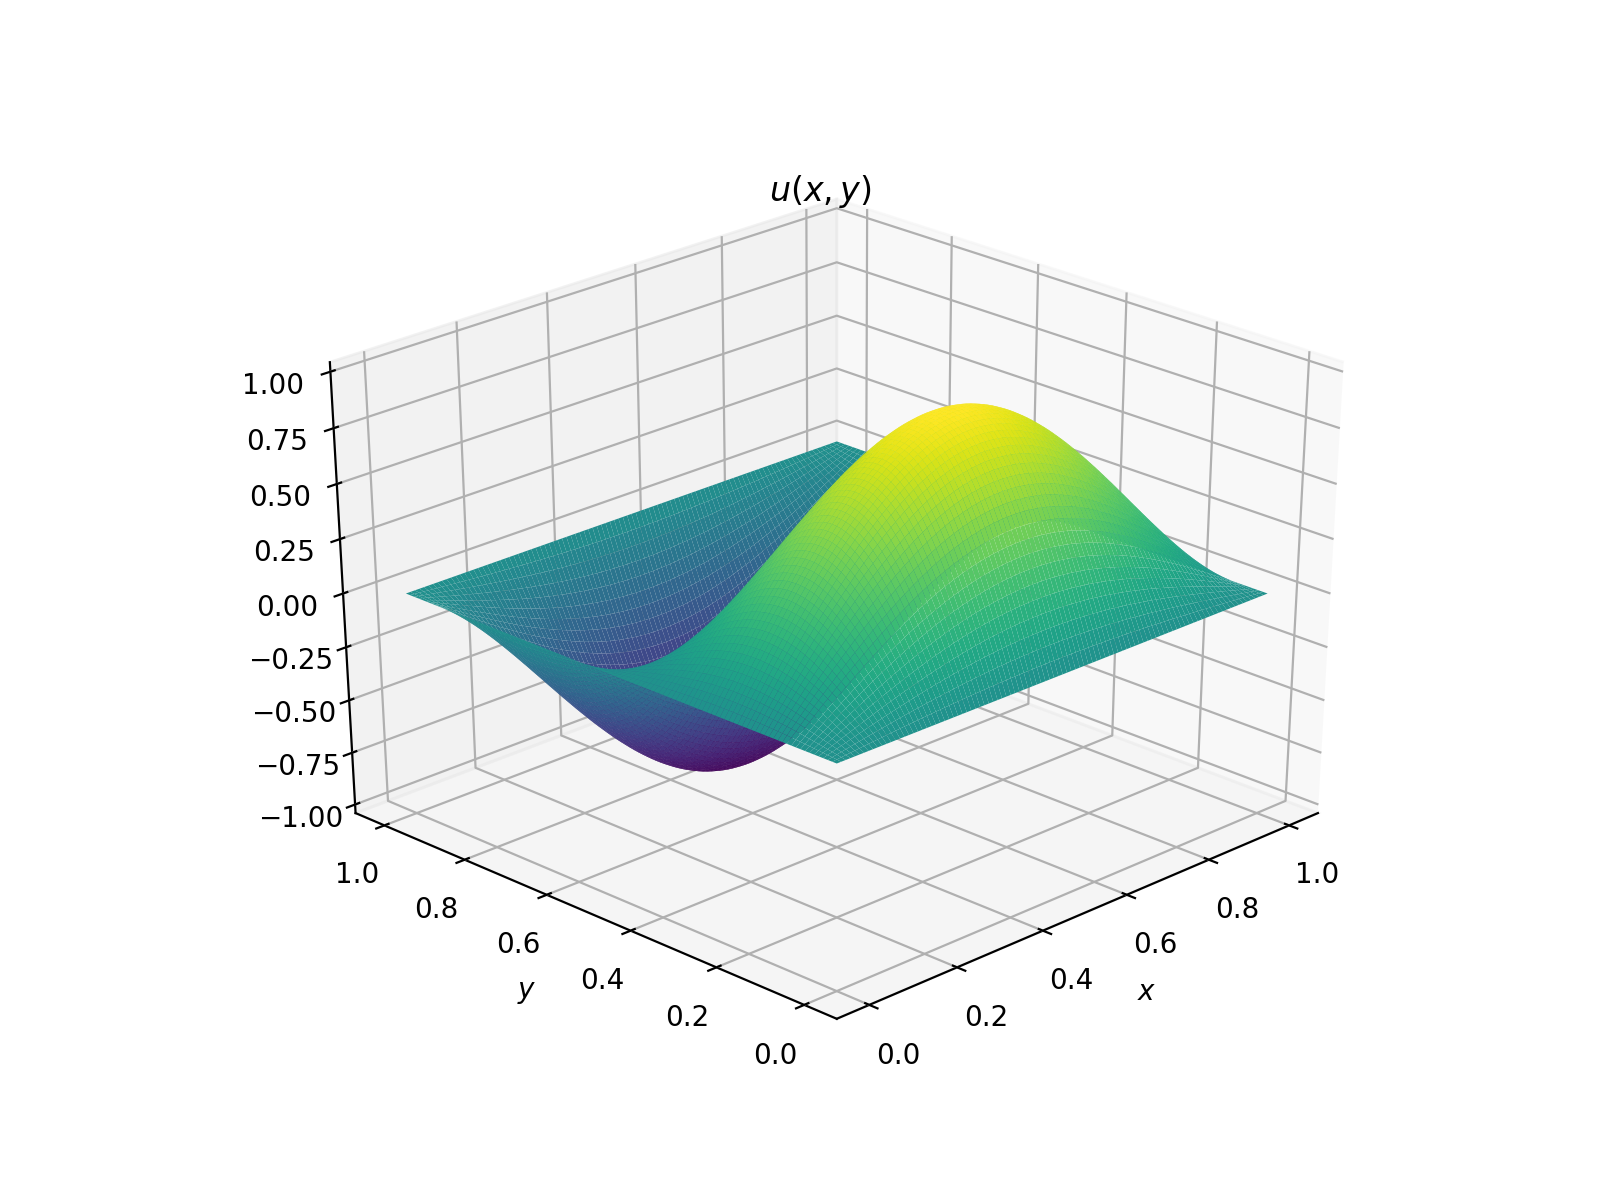

In [13]:
%matplotlib notebook 

plot2D(x, y, U_ex_grid, title="$u(x,y)$")

You can do the same for right-hand side $f$ and the 
boundary function $g$.

In [14]:
# Evaluate f on the grid. The output will be a 2 dimensional array 
# where f_grid[i,j] = f(x_i, y_j)
F_grid = f(x,y)

# Same game for boundary data g
G_grid = g(x,y)

Before we finally going to solve the Poisson problem,
we need translate the ```F_grid``` into a proper rhs vector $F$
and need to incorporate the boundary function value into $F$.

Start with flatten out $F$ and $G$:

In [15]:
# To apply bcs we have to flatten out F which is done by the ravel function
F = F_grid.ravel()

# To apply bcs we have to flatten out G which is done by the ravel function
G = G_grid.ravel()

Also, we define a function incorporating the values of ```G``` into ```F```.

In [16]:

def apply_bcs(F, G, n, I):
    # Add boundary values related to unknowns from the first and last grid ROW
    bc_indices = [I(i, j, n) for j in [0, n] for i in range(0, n + 1)] + \
                 [I(i, j, n) for i in [0, n] for j in range(0, n + 1)]
    F[bc_indices] = G[bc_indices]

    return F


Finally, solve the Poisson problem.

In [17]:
#%%timeit
# Linear algebra solvers from scipy
import scipy.linalg as la

def solve_system(n, I, F, G):
    # Compute the FDM matrix
    A = fdm_poisson_2d_matrix_dense(n, I)

    # Apply bcs
    F = apply_bcs(F, G, n, I)

    # Solve
    U = la.solve(A, F)
    #print(A.shape, F.shape)

    # Make U into a grid function for plotting
    U_grid = U.reshape((n + 1, n + 1))
    return U_grid

U_grid = solve_system(n, I, F, G)





In [ ]:
%matplotlib notebook 
# and plot f
plot2D(x, y, U_grid, title=r"$u(x,y)$ solved")


#### Task 4
Use the method of manufactured solution together with the given analytical reference solution $u_{ex}$ to compute the experimental order of convergence (EOC)
for $N = 16, 32, 64$ using $\max_{i} |U-u|$ as error measure. Summarize your results in a table. 
What convergence rate do you get? If you don't get an EOC very close to $2$, find the bugs in your code :)

In [ ]:
def numerical_poisson(u_func, n, plot=False):
    """
    Function solving a numerical system for a given n and a given true u.
    For testing errors with different n for manufactured solutions.
    """
    
    x, y = np.ogrid[0:1:(n+1)*1j, 0:1:(n+1)*1j]

    plot2D(x, y, u_func(x, y), "$u(x, y)$")
    
    f = lambda x, y: laplace_u(u_func, x, y)
    g = u_func
    
    U_ex_grid = u_ex(x, y)
    F_grid = f(x, y).ravel()
    print("Fgrid shape", F_grid.shape)
    G_grid = g(x, y).ravel()
    U_solved = U_grid = solve_system(n, I, F_grid, G_grid)
    
    plot2D(x, y, U_solved, "Solved")
    return U_ex_grid, U_solved


def u(x, y, pck=np):
    return pck.sin(1 * pck.pi * x) * pck.sin(2 * pck.pi * y)


def u_2(x, y, pck=np):
    return pck.sin(x * y)


# n = 10
# x, y = np.ogrid[0:1:(n+1)*1j, 0:1:(n+1)*1j]
# plot2D(x, y, u_2(x, y), "Test")


U_exact, U_numberical = numerical_poisson(u, 20, plot=True)



####  Task 5 
Test how large you can chose the resolution $n$ until either the problem takes too long (say 5 minutes) to compute or uses too much memory. 

Can you explain why the problem
scales so badly with respect to number of unknowns $N = (n+1)^2$? 


<font color="blue">
Solution:    
</font>

Our A matrix har dimention ${((n+1)^2)}^2 = (n+1)^4$. This means that when $n$ grows the number of points stored in A grows with a factoe $n^4$. This alone will make the runtime large quite fast for growing n. 

However even more importantly the number of operations needed to solve a linear systen of dimention m is aproximatly $m^3$. For our matrix A this results in $(n+1)^6$ operations. Meaning it we choose $n=9$ we would get $1000000$ operations. This will rapidly result in very long runtimes. 

When testing we for $n= ..$ we get a runtime of more that five minutes.



#### Task 6 

Based on your implementation above, we now implement an improved finite difference solver  using __sparse matrices__. Sparse matrices only store the
non-zero elements of a matrix. Note that the number of non-zero elements in
the finite difference matrix scales like $N$ and not like $N^2$ like __full matrices__.

Knowing the structure and entries of the matrix a priori, the most efficient 
realization would be based on (block) tridiagonal sparse matrices. 
But to allow for minimal adjustments of your previous solver implementation, we simply switch to a flexible sparse matrix format 

To this end you have change only 3 lines of code and incorporate the following code snippets into your previous code. For comparision you may want to define
a separate function ```fdm_poisson_2d_matrix_sparse(n, I)```.

In [ ]:

def fdm_poisson_2d_matrix_sparse(n, I):
    # Grid size
    h = 1.0 / n

    # Total number of unknowns is N = (n+1)*(n+1)
    N = (n + 1) ** 2

    # Define zero matrix A of right size and insert 0
    A = sp.dok_matrix((N, N))

    # Define FD entries of A
    hh = h * h
    for j in range(1, n):
        for i in range(1, n):
            A[I(i, j, n), I(i, j, n)] = 4 / hh  # U_ij, center
            A[I(i, j, n), I(i - 1, j, n)] = -1 / hh  # U_{i-1,j}, left
            A[I(i, j, n), I(i + 1, j, n)] = -1 / hh  # U_{i+1,j}, right
            A[I(i, j, n), I(i, j - 1, n)] = -1 / hh  # U_{i,j-1}, under
            A[I(i, j, n), I(i, j + 1, n)] = -1 / hh  # U_{i,j+1}, over

    # Incorporate boundary conditions
    # Add points to grid related to boundary values on the bottom and on the top.
    for j in [0, n]:
        for i in range(0, n + 1):
            # print("indeks", I(i, j, n))
            A[I(i, j, n), I(i, j, n)] = 1

    # Add boundary values related to unknowns from the first and last grid COLUMN
    for i in [0, n]:
        for j in range(0, n + 1):
            # print("ind", I(i, j, n))
            A[I(i, j, n), I(i, j, n)] = 1
    A_csr = A.tocsr() 
    return A_csr

In [ ]:
%%timeit
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

def solve_system_sparse(n, I, F, G):
    # Compute the FDM matrix
    A_sparse = fdm_poisson_2d_matrix_sparse(n, I)
    
    # Apply bcs
    F = apply_bcs(F, G, n, I)

    # Solve
   
    #U = la.solve(A, F)
    U = spsolve(A_sparse, F)

    # Make U into a grid function for plotting
    U_grid = U.reshape((n + 1, n + 1))
    return U_grid

U_grid_sparse = solve_system_sparse(n, I, F, G)



In [ ]:
%matplotlib notebook 
# and plot f
plot2D(x, y, U_grid_sparse, title=r"$u(x,y)$ solved")

#### Task 7 

Measure and compare the overall solution time for your two implementations 'fdm_poisson_2d_dense' and 'fdm_poisson_2d_sparse' by using the cell magic command %%timeit.

BURDE VI LAGE ET PLOT ELLER NOE HER SÅ DET VISES FOR LITT FLERE VERDIER? 

n = 100 

Results from the dense funciton:
14.7 s ± 731 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Results from the sparse function:
552 ms ± 91.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

As one can clearly see the dense function is a lot slower! 
